# V75

In [2]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

/Users/raka/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# V76

In [3]:
#the way of importing the data specific to statsmodels
df = sm.datasets.fair.load_pandas().data

In [4]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [5]:
def affair_check(x):
    if x != 0:
        return 1
    else :
        return 0

In [7]:
df['Had_Affair']=df['affairs'].apply(affair_check)

In [8]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [10]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


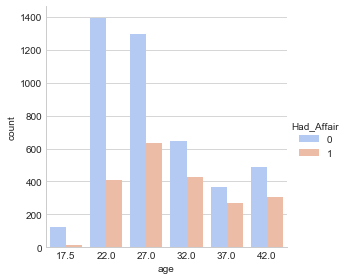

In [21]:
sns.factorplot('age',data=df,hue='Had_Affair',
               palette='coolwarm',kind='count')
#You need to explicitly pass kind="count" in factorplot, 
#see the v0.6 release notes for more information.

In [15]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


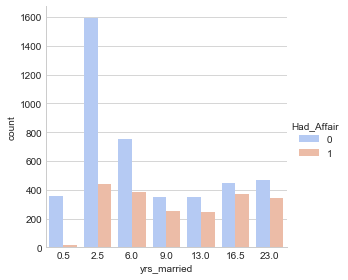

In [22]:
sns.factorplot('yrs_married',data=df,hue='Had_Affair',
               palette='coolwarm',kind='count')

sns.factorplot('children',data=df,hue='Had_Affair',
               palette='coolwarm',kind='count')

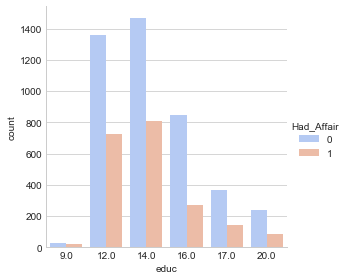

In [25]:
sns.factorplot('educ',data=df,hue='Had_Affair',
               palette='coolwarm',kind='count')

# V77

In [27]:
occ_dummies=pd.get_dummies(df['occupation'])

In [28]:
hus_occ_dummies=pd.get_dummies(df['occupation_husb'])

In [29]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


the reason that we do this is this that if we don't do this the regresson model will be confused and think that it is a spectrum ... and it could have values like 1.5 ...
we should treat the as categorical values and true false values

along spectrum

how should enter dummies in dataframe 

In [30]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']

In [31]:
hus_occ_dummies.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [50]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [51]:
dummies= pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [52]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [53]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [54]:
X=pd.concat([X,dummies],axis=1)

In [55]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [56]:
Y = df.Had_Affair
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

# V78

In [57]:
#why corelated columns is a ploblem ???
X=X.drop('occ1',axis=1)
X=X.drop('hocc1',axis=1)


In [58]:
X=X.drop('affairs',axis=1)

In [59]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [60]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [62]:
Y=np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0])

In [63]:
log_model=LogisticRegression()

In [66]:
log_model.fit(X,Y)
log_model.score(X,Y)
# accuracy rating 

0.7258875274897895

In [68]:
Y.mean()

0.3224945020420987

we want to determine how good is this 0.72 for prediction 
the model says that with 72% of accuracy 32% of wemon have affair

time 10:00

In [77]:
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

TypeError: data argument can't be an iterator

#### zip cannot be used directly, you should give the result as a list

In [78]:
coeff_df = DataFrame(list(zip(X.columns, np.transpose(log_model.coef_))))

In [79]:
coeff_df

,0,1
0,rate_marriage,[-0.6978455096539518]
1,age,[-0.05633632456391041]
2,yrs_married,[0.10389299187350667]
3,children,[0.01818532144142296]
4,religious,[-0.3685066403819364]
5,educ,[0.008647374145728168]
6,occ2,[0.2981188865493084]
7,occ3,[0.6081502910503018]
8,occ4,[0.3465112689847115]
9,occ5,[0.9422595517777723]


zip(*iterables)¶
Make an iterator that aggregates elements from each of the iterables.

In Python, an iterator is an object which implements the iterator protocol. The iterator protocol consists of two methods. The __iter__() method, which must return the iterator object, and the next() method, which returns the next element from a sequence.

Iterators have several advantages:

Cleaner code
Iterators can work with infinite sequences
Iterators save resources
Python has several built-in objects, which implement the iterator protocol. For example lists, tuples, strings, dictionaries or files.

iterator.py
#!/usr/bin/python3

# iterator.py

str = "formidable"

for e in str:
   print(e, end=" ")

print()

it = iter(str)

print(it.next())

print(it.next())

print(it.next())


print(list(it))

In the code example, we show a built-in iterator on a string. In Python a string is an immutable sequence of characters. The iter() function returns an iterator on object. We can also use the list() or tuple() functions on iterators.


$ ./iterator.py 


f o r m i d a b l e

f

o

r

['m', 'i', 'd', 'a', 'b', 'l', 'e']


In [80]:
zip(X.columns, np.transpose(log_model.coef_))


In [81]:
list(zip(X.columns, np.transpose(log_model.coef_))
)

[('rate_marriage', array([-0.69784551])),
 ('age', array([-0.05633632])),
 ('yrs_married', array([0.10389299])),
 ('children', array([0.01818532])),
 ('religious', array([-0.36850664])),
 ('educ', array([0.00864737])),
 ('occ2', array([0.29811889])),
 ('occ3', array([0.60815029])),
 ('occ4', array([0.34651127])),
 ('occ5', array([0.94225955])),
 ('occ6', array([0.9181501])),
 ('hocc2', array([0.21995711])),
 ('hocc3', array([0.324766])),
 ('hocc4', array([0.18935412])),
 ('hocc5', array([0.21309295])),
 ('hocc6', array([0.21417995]))]

In [82]:
log_model.coef_

array([[-0.69784551, -0.05633632,  0.10389299,  0.01818532, -0.36850664,
         0.00864737,  0.29811889,  0.60815029,  0.34651127,  0.94225955,
         0.9181501 ,  0.21995711,  0.324766  ,  0.18935412,  0.21309295,
         0.21417995]])

In [83]:
np.transpose(log_model.coef_)

array([[-0.69784551],
       [-0.05633632],
       [ 0.10389299],
       [ 0.01818532],
       [-0.36850664],
       [ 0.00864737],
       [ 0.29811889],
       [ 0.60815029],
       [ 0.34651127],
       [ 0.94225955],
       [ 0.9181501 ],
       [ 0.21995711],
       [ 0.324766  ],
       [ 0.18935412],
       [ 0.21309295],
       [ 0.21417995]])

In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [85]:
#randomly 75%train 25%test spriting

In [87]:
log_model2=LogisticRegression()
log_model2.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
class_predict=log_model2.predict(X_test)

In [89]:
class_predict

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
print( metrics.accuracy_score(Y_test,class_predict))

0.7248743718592965
